In [ ]:
import tensorflow as tf
import random
import os
import pathlib
import numpy as np
import pandas as pd

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-03-26 16:22:16--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.207, 142.250.99.207, 142.250.107.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  76.0MB/s    in 1.4s    

2024-03-26 16:22:17 (76.0 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
for dir_path, dir_names, file_names in os.walk("pizza_steak"):
    print(f"There are {len(dir_names)} directories and {len(file_names)} images in '{dir_path}'")


There are 2 directories and 0 images in 'pizza_steak'
There are 2 directories and 0 images in 'pizza_steak/test'
There are 0 directories and 250 images in 'pizza_steak/test/steak'
There are 0 directories and 250 images in 'pizza_steak/test/pizza'
There are 2 directories and 0 images in 'pizza_steak/train'
There are 0 directories and 750 images in 'pizza_steak/train/steak'
There are 0 directories and 750 images in 'pizza_steak/train/pizza'


In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


(384, 512, 3)


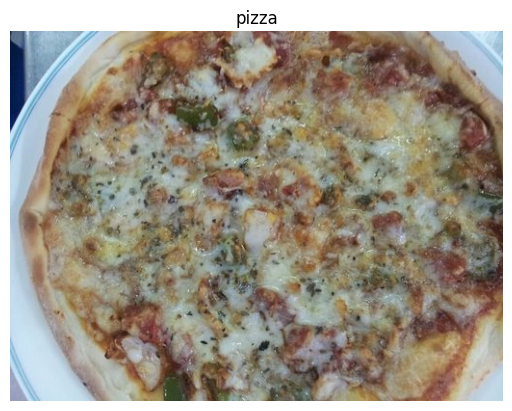

In [ ]:
import random
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def choose_sample(data_dir, class_names):
    dir_name = random.choice(os.listdir(data_dir))
    dir_file = os.path.join(data_dir, dir_name)
    sample_image_name = random.choice(os.listdir(dir_file))
    sample_image_path = os.path.join(dir_file, sample_image_name)


    img = mpimg.imread(sample_image_path)
    print(img.shape)
    plt.imshow(img)
    plt.title(class_names)
    plt.axis("off")
    plt.show()

# Example of how to call the function
choose_sample(data_dir="pizza_steak/train/", class_names="pizza")





In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size=(224,224)
bach_size=32

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_data_gen = ImageDataGenerator(rescale=1./255)
test_data_gen = ImageDataGenerator(rescale=1./255)

train_data = train_data_gen.flow_from_directory(train_dir,
                                                 target_size=img_size,
                                                 batch_size=bach_size,
                                                 class_mode="binary",
                                                 seed=42)

test_data = test_data_gen.flow_from_directory(test_dir,
                                                target_size=img_size,
                                                batch_size=bach_size,
                                                class_mode="binary",
                                                seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
import datetime
def create_tensorflow_callback(date_dir, experment_name):
    dat_dir = data_dir + "/" + experment_name + "/" + datetime.datetime.now().strftime("%y%m%d-%t%m%s")
    tensorbord_callback = tf.keras.tensorbordcallback(dat_dir=dat_dir)

    return  tensorbord_callback

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

history_1 = model.fit(train_data,
                      validation_data=test_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_steps=len(test_data),
                      callbacks=[create_tensorflow_callback(data_dir="logs", experiment_name="experiment_1")])

Epoch 1/5
47/47 [==============================] - 84s 2s/step - loss: 0.6681 - accuracy: 0.5940 - val_loss: 0.6337 - val_accuracy: 0.6400
Epoch 2/5
47/47 [==============================] - 91s 2s/step - loss: 0.6097 - accuracy: 0.6813 - val_loss: 0.5411 - val_accuracy: 0.7360
Epoch 3/5
47/47 [==============================] - 83s 2s/step - loss: 0.5633 - accuracy: 0.7193 - val_loss: 0.4875 - val_accuracy: 0.7940
Epoch 4/5
47/47 [==============================] - 82s 2s/step - loss: 0.5216 - accuracy: 0.7533 - val_loss: 0.4592 - val_accuracy: 0.7880
Epoch 5/5
47/47 [==============================] - 83s 2s/step - loss: 0.4887 - accuracy: 0.7647 - val_loss: 0.4359 - val_accuracy: 0.8040


In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 64)       

In [ ]:
model.evaluate(test_data)

16/16 [==============================] - 8s 493ms/step - loss: 0.4359 - accuracy: 0.8040


[0.43587973713874817, 0.8040000200271606]